# Вступление

 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Одна из главных задач - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные даны с 1980 по 2016 год. Рекламная акция запланирована на 2017 г. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План 

-    Загрузим и первично изучим данные, выберем необходимые библиотеки;
-    Проведем предобработку (пропуски, дубликаты, проверим верность заполнения);
-    Проведем исследовательский анализ данных и установим закономерности успешности;
-    Определим актуальный период и продолжим изучение данных;
-    Сформулируем гипотезы и проверим их;
-    По проведнному исследованию напишем вывод.


## Часть. Импорт библиотек, подгрузка данных, первичное ознакомление

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv') # загружаем

In [3]:
display(df.head(10)) #знакомимся с данными
display(df.info())
display(df.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод: Данные подгрузились исправно. Исходя из первичного осмотра, придется провести некоторую предобработку данных. В частности:
 - переименовать столбцы в соответствии с правилами "хорошего тона";
 - проверить и при необходимости исправить тип данных;
 - обработать пропуски, в зависимости от ситуации;
 - по заданию, необходимо обработать значение 'tbd' в столбце User_Score;
 - по заданию, завести новый столбец со значениями суммарных продаж в регионах.
 Приступим к выполнению.

## Предобработка данных

### Переименование столбцов

Для начала приведем названия столбцов к "змеиному регистру":

In [4]:
df.columns = [col.lower() for col in df.columns] # применим списочное выражение и метод lower.
display(df.head(5)) # посмотрим что получилось
print(df.columns) # отдельно проверим названия колонок

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Всё переименовалось верно, пробелов в названиях нет. Можно переходить к следующей задаче.

### Проверка и преобразование типа данных

In [5]:
display(df.head(10)) # Ещё раз посмотрим на дф
display(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Обратимся к документации, для уточнения содержания столбцов:
- name — название игры;
- platform — платформа;
- year_of_release — год выпуска;
- genre — жанр игры;
- na_sales — продажи в Северной Америке (миллионы проданных копий);
- eu_sales — продажи в Европе (миллионы проданных копий);
- jp_sales — продажи в Японии (миллионы проданных копий);
- other_sales — продажи в других странах (миллионы проданных копий);
- critic_score — оценка критиков (максимум 100);
- user_score — оценка пользователей (максимум 10);
- rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Первое, что бросается в глаза после осмотра дф и документации - тип данных float у year_of_release. В мире не принято делить годы на десятые доли. Поэтому этот столбец, нужно привести к целочисленным данным типа int. Сделаем это:

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
None


Так одной проблемой меньше. Также, подозрительно выглядят тип данных object в user_score и rating. Нужно посмотреть уникальные значения в этих столбцах, чтобы принять решения о типе данных в них.

In [7]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Так... в столбце рейтинга от пользователей в подавляющем большинстве значения принимают дробные числа, исключение - странное значение 'tbd'. После обработки этого странного значения, данные нужно будет перевести в тип float. Заглянем в гугл, чтобы попытаться выяснить, что это может значить. Сайт кембриджского толкового словаря английского языка (https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd) выдал следующее:
"TBD - written abbreviation for to be decided or to be determined: used when something has not yet been decided or is not yet known."
То есть, по сути отсутствие значения.
Переведем это обозначение в язык понятный Pandas - вместо tbd заведем отстутствие значения - nan:

In [8]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan #меняем 'tbd' на nan
df['user_score'] = df['user_score'].astype(float) #преобразуем данные в тип float
print(df['user_score'].unique()) #проверяем что нет 'tbd'
print(df.dtypes) #проверяем тип данных в столбцах

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


tbd заменён успешно. Тип данных поменяли на float. Идем дальше, посмотрим на значения в столбце 'rating':

In [9]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Здесь же значения исключительно строковые. Тип данных менять не требуется.

### Обработка пропусков в данных

Напишем цикл, который выведет количество пропусков во всех столбцах:

In [10]:
for col in df.columns:
    miss_val = df[col].isnull().sum()
    print(f'Столбец "{col}" содержит {miss_val} пропусков.')

Столбец "name" содержит 2 пропусков.
Столбец "platform" содержит 0 пропусков.
Столбец "year_of_release" содержит 269 пропусков.
Столбец "genre" содержит 2 пропусков.
Столбец "na_sales" содержит 0 пропусков.
Столбец "eu_sales" содержит 0 пропусков.
Столбец "jp_sales" содержит 0 пропусков.
Столбец "other_sales" содержит 0 пропусков.
Столбец "critic_score" содержит 8578 пропусков.
Столбец "user_score" содержит 9125 пропусков.
Столбец "rating" содержит 6766 пропусков.


Таак...пропусков немало. пойдем по порядку.

#### name

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По всей видимости, 2 игрушки на Sega Genesis с разными локализациями (США-Европа и отдельно Япония). Ни названий, ни жанров, есть данные по продажам. Трудно однозначно сказать, почему не заполнены все ячейки. Рискну преположить, что для технической ошибки слишком мало (всего 2) таких пропуска. Скорее всего, человеческий фактор.
Можно было бы удалить эти строки в виду их пустот и малочисленности, но пока оставим. Есть данные по платформе, продажам и году выпуска. Могут пригодится. Тем более, есть правило сохраннеия 90% данных для актуального анализа.
Поскольку в столбце genre тоже пропуски,и они же видны на ранее выведенной таблице пропусков, возвращаться дополнительно к этим двум пропускам мы не будем.

#### year_of_release

In [12]:
df[df['year_of_release'].isna()].head(20) #посмотрим внешне на данные с пропусками в этом столбце

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Однозначно сказать, почему такое количество пропусков трудно. Они присутствуют в разных жанрах, на разных платформах. Можно было бы преположить, что отсутвие данных о выпуске как-то связано с "возрастом" игры, но столбец platform опровергает это преположение. Так коды не указаны как на пожилых платформах (PS (playstation), XB (xbox)), так и на относительно свежих (Nintendo Wii, Xbox 360, Playstation 3). Думаю, пока речь идет, либо также о человеческом факторе (не прилежно заполняли данные), либо техническая ошибка. Пропусков немного, существенно на анализ такие данные не повлияют. Пока оставим как есть.
Альтернатива, если бы таких данных было бы много, можно было бы как-то привязаться к периодам популярности той или иной платформы. Возможно, год выпуска платформы и проставить недостающие значения таким образом. Вручную догугливать данные по 269 играм - как мне кажется - не совсем корректно, для аналитического исследования. Пока не будем трогать пропуски.

#### critic_score, user_score, rating

Ранее, было обнаружено, что в трех этих столбцах пропуски данных составляют практически 50% и более.

In [13]:
df['critic_score'].isna().sum() #еще раз посмотрим на количество пропусков

8578

In [14]:
df['user_score'].isna().sum() #еще раз посмотрим на количество пропусков

9125

In [15]:
df['rating'].isna().sum() #еще раз посмотрим на количество пропусков

6766

Попробуем визуализировать данные:

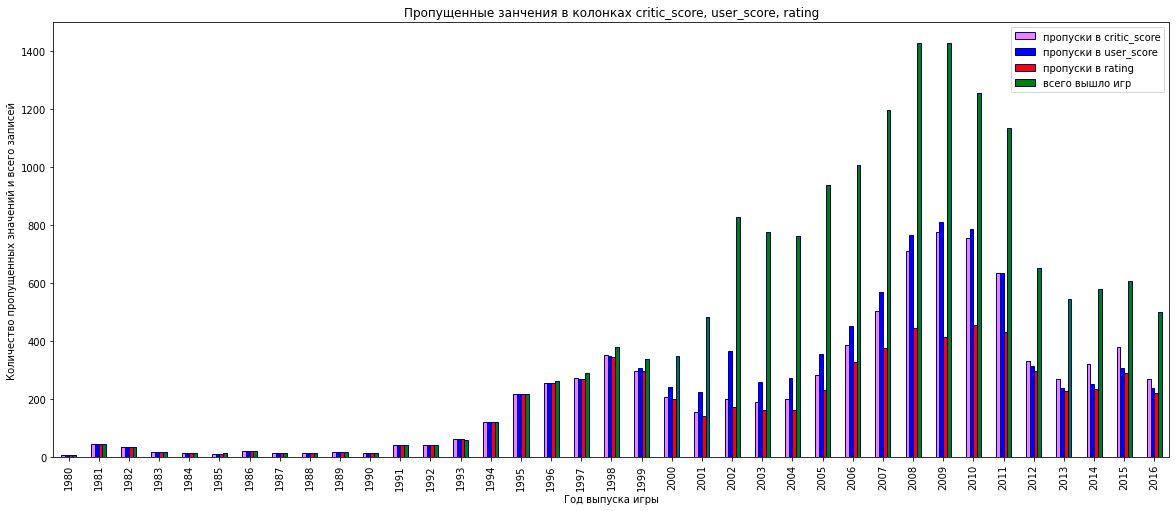

In [16]:
missing_values_by_year = df.groupby('year_of_release').agg({'critic_score': lambda x: x.isnull().sum(),
                                                  'user_score': lambda x: x.isnull().sum(),
                                                  'rating': lambda x: x.isnull().sum(), 'name':'count'}) # пришлось хорошенько повозится с этим кодом
ax = missing_values_by_year.plot(kind='bar', figsize=(20, 8), color=['violet', 'blue', 'red', 'green'], edgecolor='darkblue')
ax.legend(['пропуски в critic_score', 'пропуски в user_score', 'пропуски в rating', 'всего вышло игр'])
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество пропущенных значений и всего записей')
plt.title('Пропущенные занчения в колонках critic_score, user_score, rating')
plt.show()

Изначально, можно было бы предположить, что до определённого момента (где-то до начала 1990-х) сервисов по оценке видеоигр как таковых не было и данная статистика не велась, но эта гистограмма говорит от обратном - пропусков стало больше с течением времени, с конца 1990 годов, собственно как и вышедших игр. Мое предположение, что у простых людей да и даже у критиков не было временной возможности играть (на пике) во все 1400 игр в год, что примерно равно 4 играм в сутки. Всегда есть популярные игры которые у всех на слуху, а есть те, о которых слышали десятки, а играли единицы.
Думаю, что заполнять пропуски медианой или средним в данном случае некорректно, их слишком много, а это может исказить результат исследования.

### Столбец с суммарными продажами

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # добавим столбец
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


вроде бы всё корректно. Пойдем дальше.

### Проверка на явные дубликаты и странные значения

#### Дубликаты

In [18]:
df.duplicated().sum() # проверим, не лежат ли дубликаты "на поверхности")

0

Не лежат. Посмотрим еще по парам название-платформа:

In [19]:
df[df.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+,0.48
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


Таак, что-то есть, пройдемся по этому списку:

In [20]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


Хотя всё и выглядит как дубликат, но это не так. Разные года, разные платформы. Удалять нельзя.

In [21]:
df[df['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN,4.33
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+,1.03
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48


Похожая ситуация, но записи 1745 и 4127 и есть дубликаты, хотя у второй год и не указан но платформы у обеих PS3, рейтинги критиков у них одинаковые. Конкретно в этом случае, думаю строку 4127 можно просто удалить.

In [22]:
df.drop(index=4127, inplace=True) #удаляем
df[df['name'] == 'Sonic the Hedgehog'] #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN,4.33
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+,1.03


Хорошо, идём дальше.

In [23]:
df[df['name'].isnull()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Всё теже 2 игры из Sega Genesis. Удалить их или нет... вообще данных по играм по этому году (1993) исходя из гистограммы совсем немного, пусть пока останутся.

In [24]:
df[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Аналогичная Ёжику-Сонику ситуация. Удаляем строку 16230, она менее информативная.

In [25]:
df.drop(index=16230, inplace=True) #удаляем
df[df['name'] == 'Madden NFL 13'] #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23


#### Странные значения

In [26]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16445.000000,16713.000000,16713.000000,16713.000000,16713.000000,8135.000000,7588.000000,16713.000000
mean,2006.484281,0.263409,0.145048,0.077626,0.047348,68.969146,7.125659,0.533430
std,5.877071,0.813647,0.503361,0.308871,0.186741,13.936036,1.499686,1.548349
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16445 non-null  Int64  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           9947 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


Отрицательных значений нет. После удаления двух дубликатов следует сбросить индекс на всякий случай и можно переходить к исследовательскому анализу данных.

In [28]:
df.reset_index(drop=True, inplace=True) #Сбрасываем
display(df.tail(5)) # Проверяем нумерацию с конца

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
16712,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01


In [29]:
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16445 non-null  Int64  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           9947 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во N

Вывод после предобработки:
    
    После загрузки данных и первичного ознакомления с данными было проведена предобработка данных, которая включала:
-    Переименование столбцов и приведение их к змеиному регистру;
-    После выяснения значения аббревиатуры "tbd" она была заменена на пропуск - NaN;
-    Подсчет пропусков и их первичная обработка (в большинстве случаев, пропуски было решено пока оставить до начала работы над следующими задачами, чтобы сберечь данные), причем стоит отдельно отметить, что в некоторых столбцах количество пропусков достигало более 50%. В столбцах critic_score и user_score можно было бы заменить всё медианным значением, но пропусков слишком много, скорее всего это исказит результаты исследования. Пропуски в столбце rating также был оставлен как есть, ввиду того, что данные даны практически по всему миру, а ESRB - организация, которая присваивает рейтинг в Северной Америке, поэтому логично, что игры из других стран могут не иметь рейтинга;
-    В столбце year_of_release был поменен тип данных с float на int;
-    Проведена проверка на явные дубликаты и "не совсем явные", в результате проверки было удалено несколько дублирующих строк.

## Исследовательский анализ данных

### Данные по играм в разные годы

Строим график по сгруппированным данным:

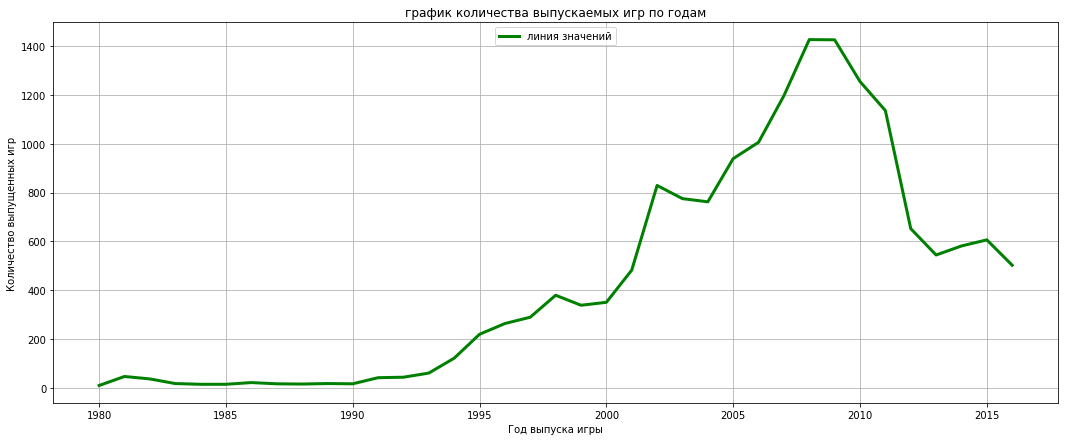

In [30]:
df.groupby('year_of_release').agg({'name': 'count'}).plot(figsize = (18,7), color = 'green', grid=True, label = 'график количества выпускаемых игр по годам', linewidth=3)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.title('график количества выпускаемых игр по годам')
plt.legend(labels=['линия значений'], loc='upper center')
plt.show()

Судя по графику, с середины 1990-ых годов начался рост выпуска видеоигр, затем после пика в 2008-2009 гг., количество выпускаемых игр стало снижаться. Для ответа на вопрос нужны ли все данные за все периоды - недостаточно вводных по вопросу. Смотря для чего и зачем. Думаю в следующем вопросе будет понятно. Перейдем к нему.

### Суммарные продажи по платформам и распределение по годам

Выбираем платформы с наибольшими продажами:

In [31]:
df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.16
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Определим их как топ-5. Это Playstation 2, Xbox 360, Playstation 3, Nintendo Wii, Nintendo DS. Далее идут платформы хоть и относительно свежие, но продажи их меньше, возможно из-за того что эти приставки не так давно вышли на тот момент и покупки не успели набрать обороты. Построим графики:


*P.S. Изначально я хотел взять Топ-7, но график который идет дальше сильно перегружался. Поэтому ограничился Топ-5.
В целом, я не совсем уверен что 5 линий на одном графике - это хорошая идея, но пока оставил. Альтернатива - отдельные друг от друга 5 графиков. Мне первый вариант больше по душе, я попытался сделать его максимально читаемым.

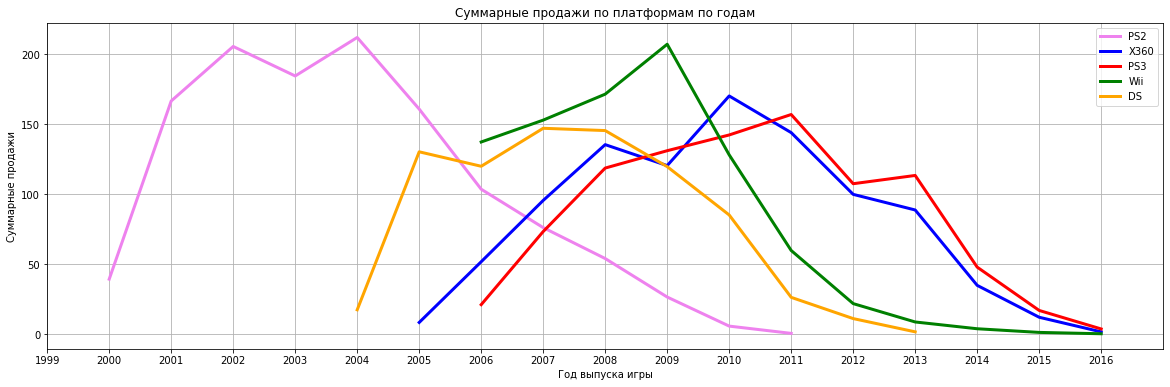

In [32]:
# Запросы для каждой платформы
ps2_sales = df.query('platform == "PS2"').groupby('year_of_release').agg({'total_sales': 'sum'})
x360_sales = df.query('platform == "X360"').groupby('year_of_release').agg({'total_sales': 'sum'})
ps3_sales = df.query('platform == "PS3"').groupby('year_of_release').agg({'total_sales': 'sum'})
wii_sales = df.query('platform == "Wii"').groupby('year_of_release').agg({'total_sales': 'sum'})
ds_sales = df.query('platform == "DS"').groupby('year_of_release').agg({'total_sales': 'sum'})


# Объединение данных в один дф
merged_data = pd.concat([ps2_sales, x360_sales, ps3_sales, wii_sales, ds_sales], axis=1)
merged_data.columns = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Построение графика
ax = merged_data.plot(kind='line', figsize=(20, 6), color=['violet', 'blue', 'red', 'green', 'orange'], linewidth=3)
ax.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS'])
plt.xlabel('Год выпуска игры')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по платформам по годам')
plt.xlim(1999, 2017)
plt.xticks(range(1999, 2017, 1))
plt.grid(which='both', axis='both')
plt.show()

Как видно из графиков, средний срок жизни новой игровой платформы - 10 лет. Графики отличаются формами, но не отличаются напрвлением движения - сначала бурный рост, пик, а потом плавное снижение и исчезновение.

### Определение актуального периода

Несмотря на то, что средний срок жизни платформы определился как 10 лет, думаю, что для определения актуального периода нам достаточно будет половины этого срока. 
Исходя из ранее полученных данных, можно предположить актуальный период как промежуток между 2012 и 2017 годом. Разница в пять лет позволит увидеть общую динамику показателей (появление новых платформ и их выход на рынок, или же исчезновение старых платформ и их уход с рынка).Эти даннык помогут нам в прогнозе за 2017 год.

Сформируем новый датафрейм, в котором будем хранить данные только за интересующий нас период.

In [34]:
df_new = df[df['year_of_release'] >= 2012]
display(df_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Выбор лидирующих платформ на отрезке актуального периода.

Итак, теперь визуализируем данные, чтобы понять какие платформы пошли в рост за актуальный период, какие начали падение:

In [35]:
df_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [36]:
# Продажи по годам для каждой платформы
grouped = df_new.groupby(['platform', 'year_of_release'])['total_sales'].sum()
grouped = grouped.unstack()
display(grouped)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


DS в этой таблице мало информативна, похоже она исчезает с рынка удалим эту строку:

In [37]:
grouped = grouped.drop('DS', axis=0)
display(grouped)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52


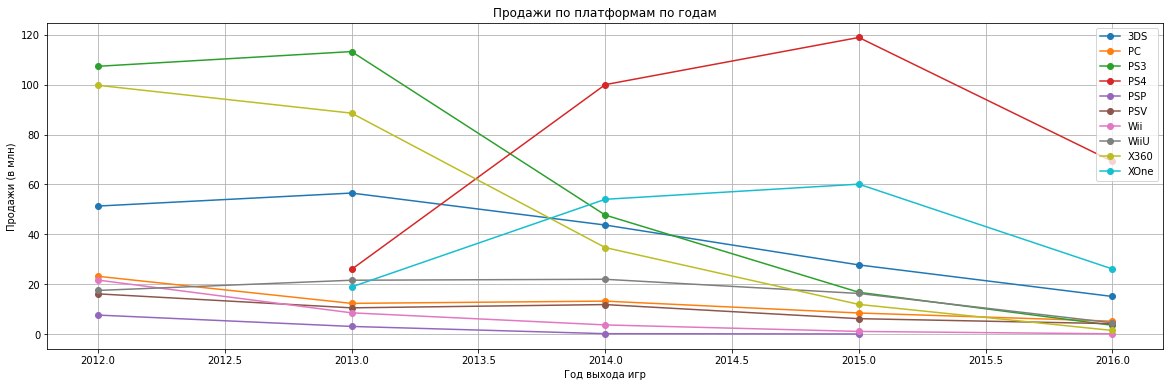

In [38]:
plt.figure(figsize=(20, 6))

for platform in grouped.index:
    plt.plot(grouped.columns, grouped.loc[platform], marker='o', label=platform)

plt.xlabel('Год выхода игр')
plt.ylabel('Продажи (в млн)')
plt.title('Продажи по платформам по годам')
plt.legend()
plt.grid(True)
plt.show()

На графике видно, что практически все платформы к концу 2016 года переживают нелучшие времена, продажи у всех падают.  Но если выбирать наиболее лучшие варианты - то это будет PS4, Xbox One и 3DS. Думаю, что дальше в исследовании будем использовать их.


### Boxplot'ы для продаж по платформам

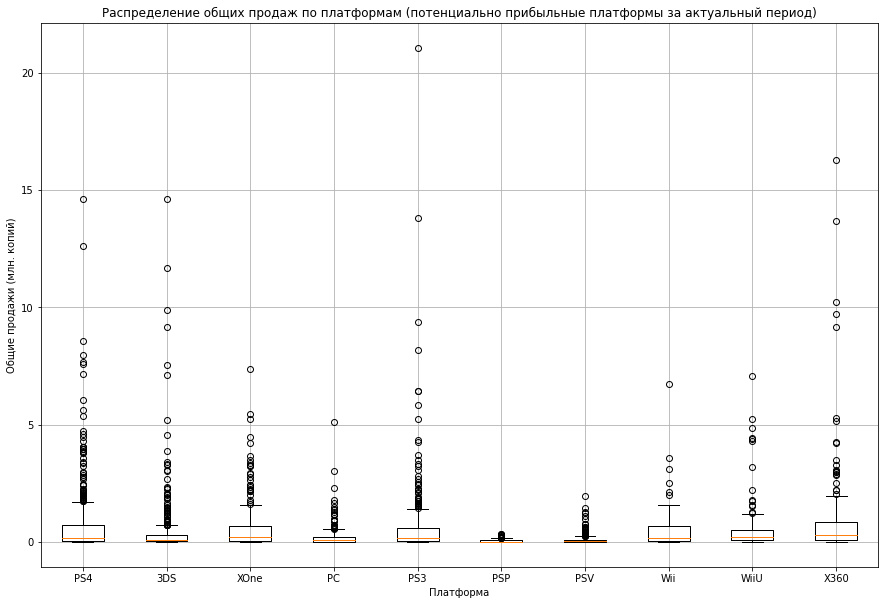

In [39]:
act_plat = df_new.query('platform in ["PS4", "3DS", "XOne", "PC", "PS3", "PSP", "PSV", "Wii", "WiiU", "X360"]')[['platform', 'total_sales']]

# Построим boxplot
plt.figure(figsize=(15, 10))
plt.boxplot([act_plat[act_plat['platform'] == 'PS4']['total_sales'],
             act_plat[act_plat['platform'] == '3DS']['total_sales'],
             act_plat[act_plat['platform'] == 'XOne']['total_sales'],
             act_plat[act_plat['platform'] == 'PC']['total_sales'],
             act_plat[act_plat['platform'] == 'PS3']['total_sales'],
             act_plat[act_plat['platform'] == 'PSP']['total_sales'],
             act_plat[act_plat['platform'] == 'PSV']['total_sales'],
             act_plat[act_plat['platform'] == 'Wii']['total_sales'],
             act_plat[act_plat['platform'] == 'WiiU']['total_sales'],
             act_plat[act_plat['platform'] == 'X360']['total_sales']
            ],
            labels=["PS4", "3DS", "XOne", "PC", "PS3", "PSP", "PSV", "Wii", "WiiU", "X360"])
plt.title("Распределение общих продаж по платформам (потенциально прибыльные платформы за актуальный период)")
plt.xlabel("Платформа")
plt.ylabel("Общие продажи (млн. копий)")
plt.grid(True)
plt.show()

Полно выбросов - игр с большим количеством продаж, причем праткически у всех платформ, за исключением Wii (у нее по сравнению с остальными немного). Немного детализируем чтобы посмотреть на медиану.

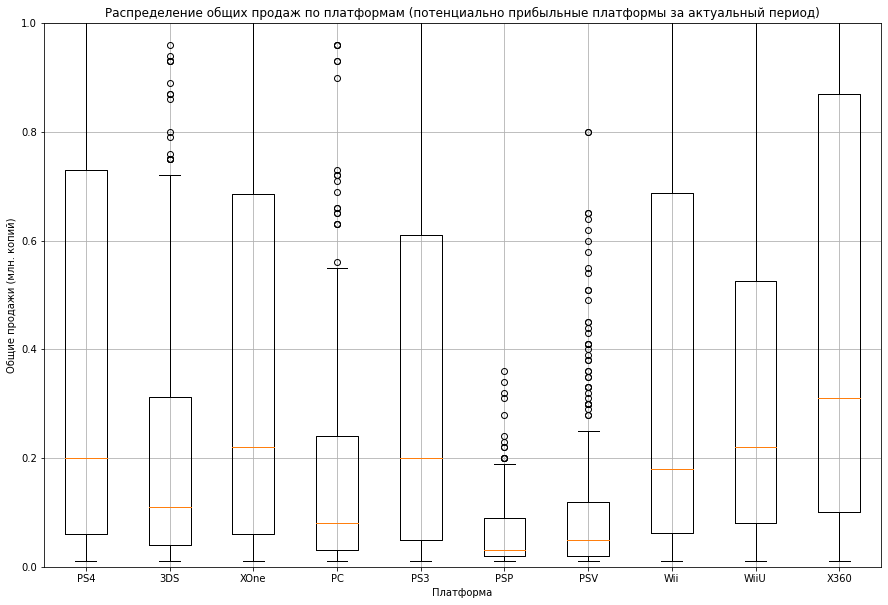

In [40]:
act_plat = df_new.query('platform in ["PS4", "3DS", "XOne", "PC", "PS3", "PSP", "PSV", "Wii", "WiiU", "X360"]')[['platform', 'total_sales']]

# Построим boxplot
plt.figure(figsize=(15, 10))
plt.boxplot([act_plat[act_plat['platform'] == 'PS4']['total_sales'],
             act_plat[act_plat['platform'] == '3DS']['total_sales'],
             act_plat[act_plat['platform'] == 'XOne']['total_sales'],
             act_plat[act_plat['platform'] == 'PC']['total_sales'],
             act_plat[act_plat['platform'] == 'PS3']['total_sales'],
             act_plat[act_plat['platform'] == 'PSP']['total_sales'],
             act_plat[act_plat['platform'] == 'PSV']['total_sales'],
             act_plat[act_plat['platform'] == 'Wii']['total_sales'],
             act_plat[act_plat['platform'] == 'WiiU']['total_sales'],
             act_plat[act_plat['platform'] == 'X360']['total_sales']
            ],
            labels=["PS4", "3DS", "XOne", "PC", "PS3", "PSP", "PSV", "Wii", "WiiU", "X360"])
plt.ylim(0,1)
plt.title("Распределение общих продаж по платформам (потенциально прибыльные платформы за актуальный период)")
plt.xlabel("Платформа")
plt.ylabel("Общие продажи (млн. копий)")
plt.grid(True)
plt.show()

In [41]:
display(act_plat.groupby('platform')['total_sales'].median().sort_values(ascending=False)) # Сгруппируем данные, чтобы точно определить медианы

platform
X360    0.31
WiiU    0.22
XOne    0.22
PS4     0.20
PS3     0.20
Wii     0.18
3DS     0.11
PC      0.08
PSV     0.05
PSP     0.03
Name: total_sales, dtype: float64

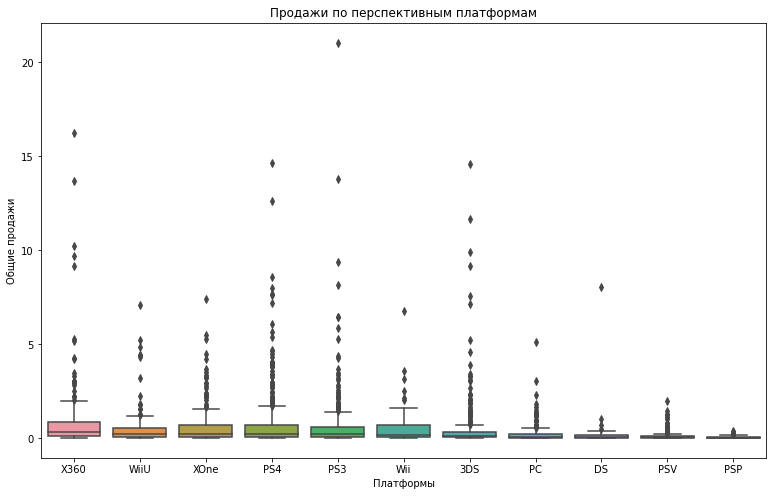

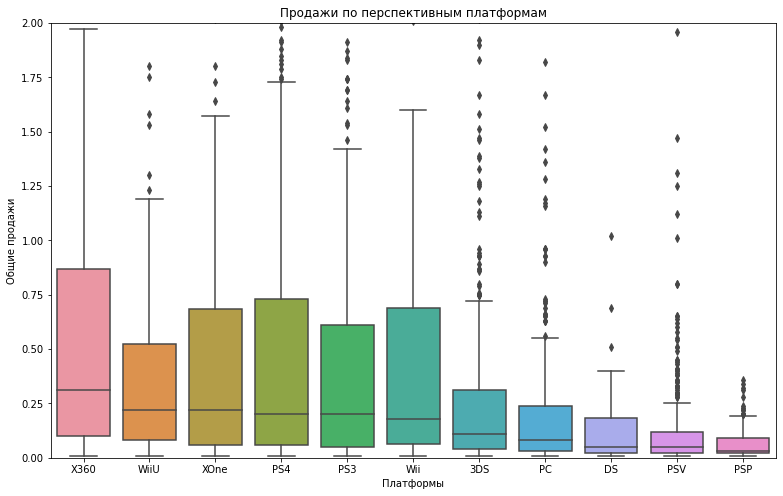

In [73]:
# Еще вариант боксплотов через seaborn
import seaborn as sns
data_temp, y = df_new.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform', 
    order=data_temp.groupby('platform')[y].median().sort_values(ascending=False).index)
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform', 
    order=data_temp.groupby('platform')[y].median().sort_values(ascending=False).index)
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

Исходя и графиков можно утверждать, что данные платформы пока еще (на момент 2016 года) остаются весьма прибыльными. Судя по выбросам на боксплотах, можно заметить, что на всех платфомармах выходило достаточно большое количество игр с высокими продажами. Самые высокое медианное значение имеет Xbox 360. это вполне объяснимо тем, что на тот период данная приставка уже имела обширный опыт применения и на нее вышло достаточно большое количество игр-бестселлеров. Следом за ней с не очень большими отставаниями идут PS4, Xbox One, PS3 и WiiU. Замыкают рейтинг продаж PSP и PSV. Отчасти, наверно это можно объяснить тем, что эти приставки портативные, спрос на них меньше. При наличии смартфона, можно вполне обойтись без таких платформ.

### Влияние отзывов на продажи

In [42]:
# Возьмем в качестве выборки список платформ с наибольшими продажами
platforms = ['X360', 'WiiU', 'PS4', 'PS3', 'XOne']

In [43]:
for platform in platforms:
    platform_data = df_new.query(f'platform == "{platform}"')[['critic_score', 'user_score', 'total_sales']]
    correl = platform_data.corr()
    print(f"Корреляция для платформы {platform}:")
    display(correl)

Корреляция для платформы X360:


,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
total_sales,0.360573,0.006164,1.000000


Корреляция для платформы WiiU:


,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


Корреляция для платформы PS4:


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Корреляция для платформы PS3:


,critic_score,user_score,total_sales
critic_score,1.000000,0.544510,0.334152
user_score,0.544510,1.000000,-0.006206
total_sales,0.334152,-0.006206,1.000000


Корреляция для платформы XOne:


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


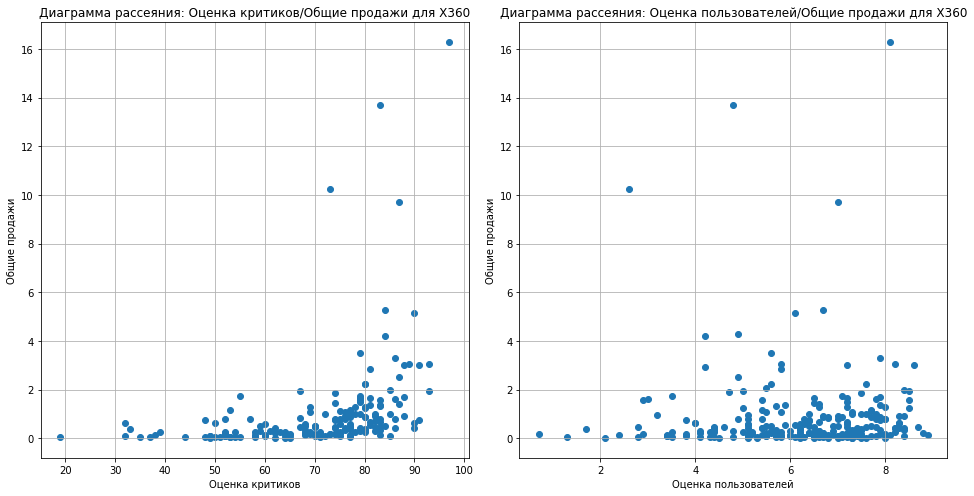

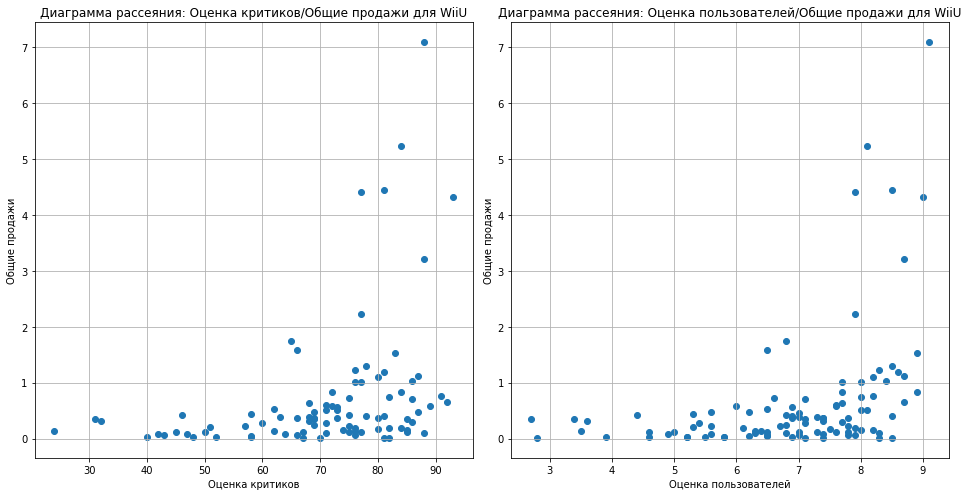

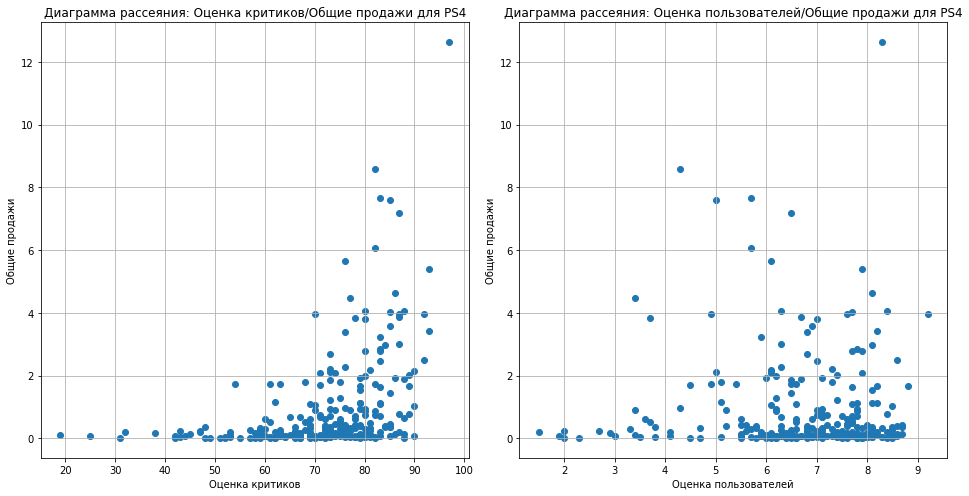

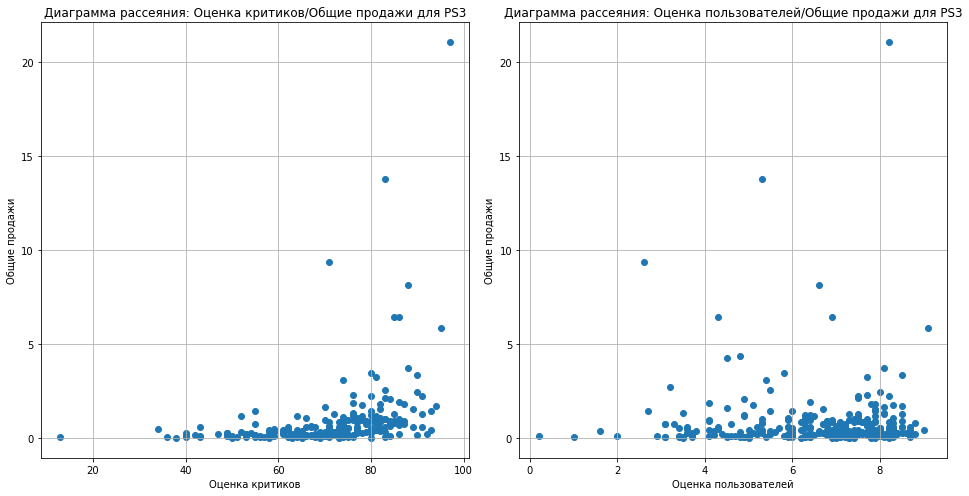

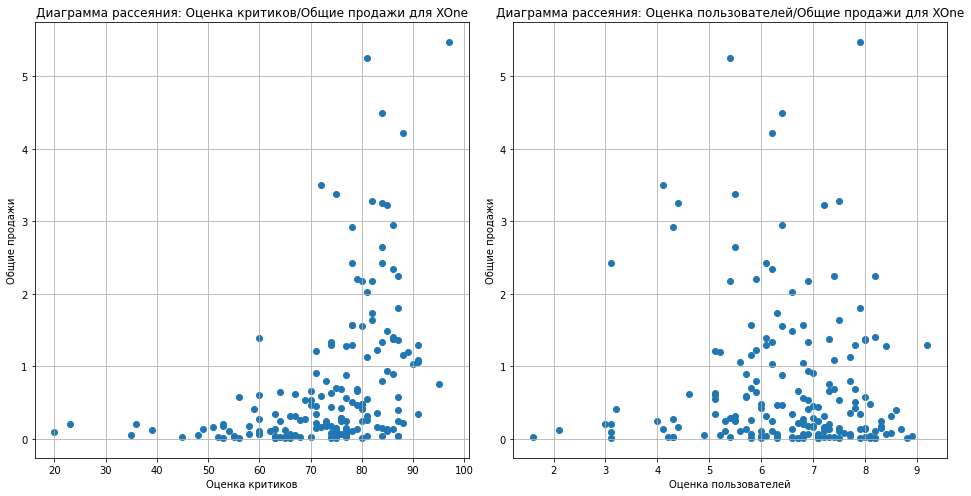

In [44]:
for platform in platforms: #цикл для диаграмм рассеяния
    plt.figure(figsize=(20, 7))

    plt.subplot(1, 3, 1)
    plt.scatter(df_new.query(f'platform=="{platform}"')['critic_score'], df_new.query(f'platform=="{platform}"')['total_sales'])
    plt.xlabel('Оценка критиков')
    plt.ylabel('Общие продажи')
    plt.title(f'Диаграмма рассеяния: Оценка критиков/Общие продажи для {platform}')
    plt.grid(True)

    # Диаграмма рассеяния оценка пользователей/продажи
    plt.subplot(1, 3, 2)
    plt.scatter(df_new.query(f'platform=="{platform}"')['user_score'], df_new.query(f'platform=="{platform}"')['total_sales'])
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Общие продажи')
    plt.title(f'Диаграмма рассеяния: Оценка пользователей/Общие продажи для {platform}')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Вывод: Исходя из полученных данных, можно сказать что, присутствует небольшая положительная корреляция между общими продажами и отзывами критиков это видно и на лидирующей по продажажам PS4 и на всех остальных из выбранных 5. Корреляции общих продаж и отзывов пользователей нет, исключение - приставка WiiU там есть небольшая корреляция между отзывами пользователей и общими продажами.

<font color='DarkGreen'> Для оценки корреляции воспользуемся шкалой:</font>
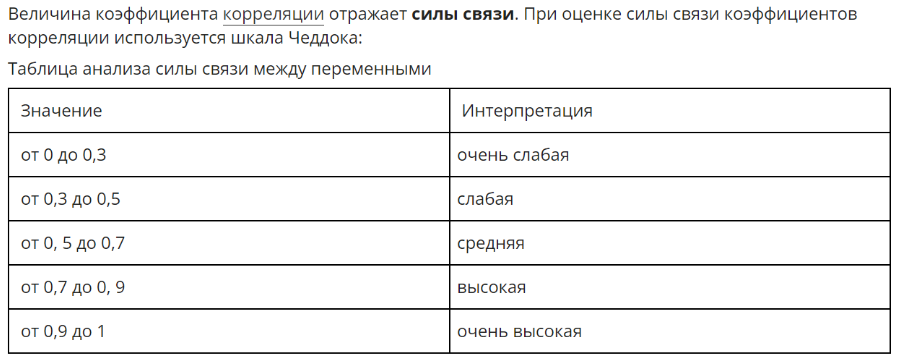

### Распределение игр по жанрам

In [45]:
# посчитаем средние продажи по жанрам
genre_grouped = df_new.groupby('genre').agg({'total_sales': 'mean'}).sort_values(by='total_sales')
genre_grouped.reset_index(inplace=True)
genre_grouped.columns = ['genre', 'total_sales']
display(genre_grouped)

,genre,total_sales
0,Adventure,0.097450
1,Puzzle,0.174643
2,Strategy,0.187887
3,Fighting,0.408165
4,Action,0.427856
5,Simulation,0.439000
6,Misc,0.442917
7,Racing,0.465217
8,Role-Playing,0.521081
9,Sports,0.678127


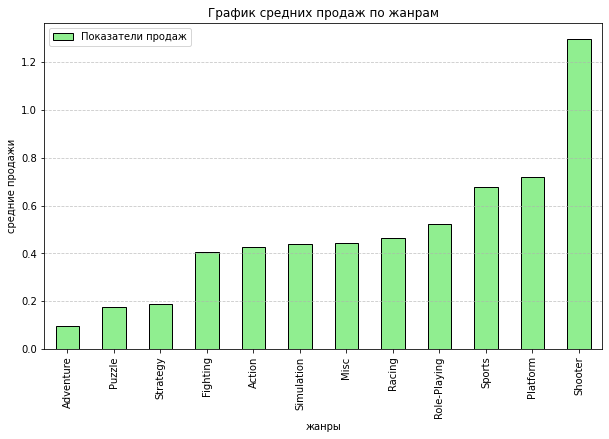

In [46]:
# Построим столбчатый график
genre_grouped.plot(kind = 'bar', x = 'genre', y='total_sales', figsize=(10, 6), color='lightgreen', edgecolor='black')

plt.xlabel('жанры')
plt.ylabel('cредние продажи')
plt.title('График средних продаж по жанрам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Показатели продаж'])
plt.show()

Из выведенных данных можно заметить следующее. Игры жанра shooter - лидеры продаж, затем идут platform и sports. Игры жанров role-playing, racing, simulation, misc, action и fighting имеют близкие показатели продаж. Игры жанров strategy, puzzle и adventure замыкают рейтинг.

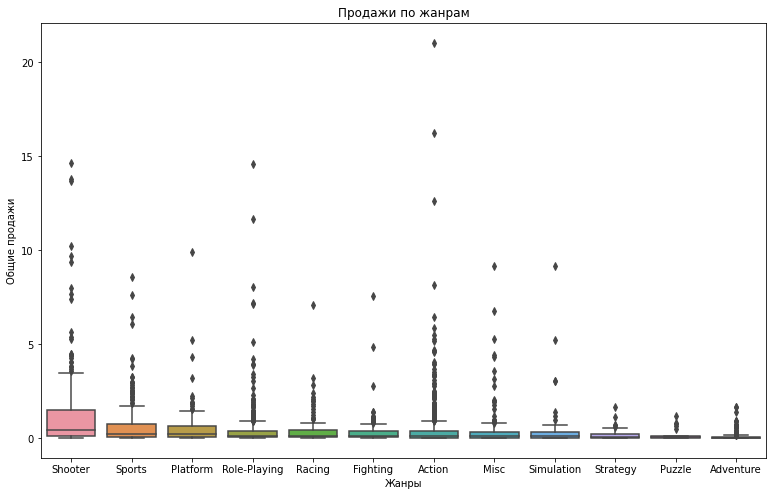

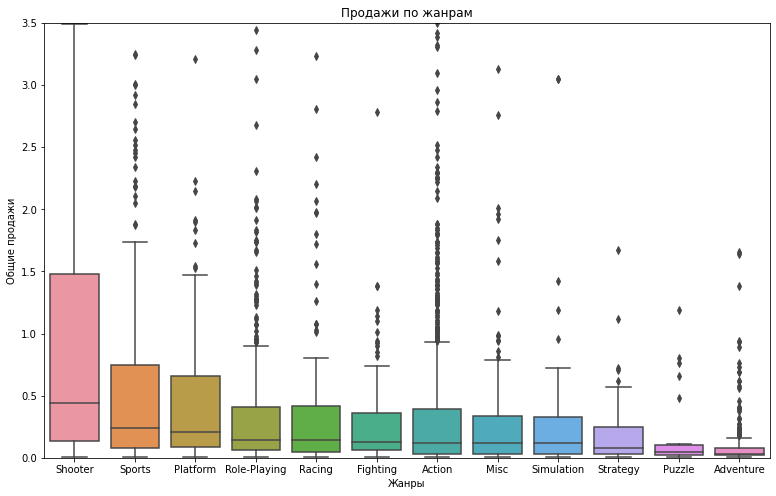

In [74]:
# Сравнение продаж с использованием боксплота:
import seaborn as sns
data_temp, y = df_new.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre',
    order=data_temp.groupby('genre')[y].median().sort_values(ascending=False).index)
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre',
    order=data_temp.groupby('genre')[y].median().sort_values(ascending=False).index)
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.

## Портрет пользователя каждого региона

### Типичный пользователь из Северной Америки

Определим какие платформы наиболее популярны в Америке:

In [47]:
df_new.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


Построим круговую диаграмму:

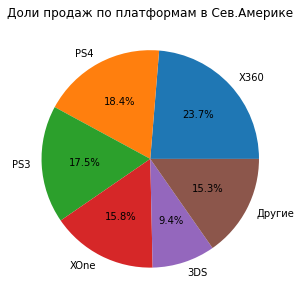

In [48]:
na_p_sales = df_new.groupby('platform')['na_sales'].sum().reset_index()

top_na_platforms = na_p_sales.sort_values(by='na_sales', ascending=False).head(5)

other_nap_sales = na_p_sales[~na_p_sales['platform'].isin(top_na_platforms['platform'])]['na_sales'].sum() #это пришлось догугливать

top_na_platforms.loc[len(top_na_platforms)] = ['Другие', other_nap_sales]

plt.figure(figsize=(5, 5))
plt.pie(top_na_platforms['na_sales'], labels=top_na_platforms['platform'], autopct='%1.1f%%')
plt.title('Доли продаж по платформам в Сев.Америке')
plt.show()

Из диаграммы понятно, что основную долю рынка в Северной Америке за актуальный период забирает xbox 360 (23,7% продаж) (исходя из ранее построенных графиков стоит отметить, что, вероятно, если бы мы взяли период покороче ~3 года, лидером была бы PS4). Следом за ней идут PS4 (18,4%), Xbox One (17,5%). Затем идет Nintendo 3DS (9,4%), которую сумарно подвинули категория "другие" (15,3%).

Определим какие жанры популярны в Америке:

In [49]:
df_new.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending = False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


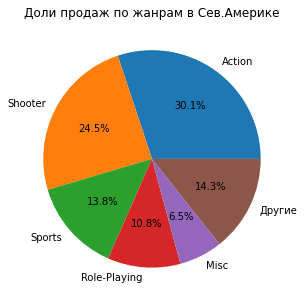

In [50]:
na_g_sales = df_new.groupby('genre')['na_sales'].sum().reset_index()

top_na_genres = na_g_sales.sort_values(by='na_sales', ascending=False).head(5)

other_nag_sales = na_g_sales[~na_g_sales['genre'].isin(top_na_genres['genre'])]['na_sales'].sum()

top_na_genres.loc[len(top_na_genres)] = ['Другие', other_nag_sales]

plt.figure(figsize=(5, 5))
plt.pie(top_na_genres['na_sales'], labels=top_na_genres['genre'], autopct='%1.1f%%')
plt.title('Доли продаж по жанрам в Сев.Америке')
plt.show()

Из диаграммы понятно, что основную долю рынка за актуальный период забирает Action(30,1%) и Shooter (24,5%). Следом за ними идут Sports(13,8%), Role-playing(10,8%) и Misc (6,5%). Все остальные жанры суммарно занимают около 14,3% продаж.

Определим какие возрастные категории популярны среди геймеров в Америке:

P.S. Сначала думал, что можно не брать в расчет игры без рейтинга, но по итогу, понял что нужно все-таки провести следующую операцию:

In [51]:
#заменим пропуски в столбце rating на 'WR' - without rating 
df_new.loc[:, 'rating'] = df_new.loc[:, 'rating'].fillna(value='WR')

In [52]:
df_new.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending = False).head(5)

,na_sales
rating,
M,231.57
E,114.37
WR,103.31
E10+,75.70
T,66.02


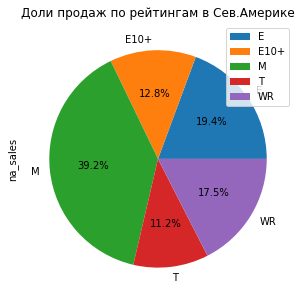

In [53]:
df_new.groupby('rating').agg({'na_sales': 'sum'}).plot(kind='pie', figsize=(5,5), y = 'na_sales', autopct='%1.1f%%')
plt.title('Доли продаж по рейтингам в Сев.Америке')
plt.show()

Вывод по рейтингам в Северной Америке: с большим отрывом продаются игры с рейтингом M(17+) (39,2%); игры с рейтингами E(Для всех)(19,4%) и без рейтинга (17,5%) существенно отстают. Игры с рейтингами E10+ (10+) (12,8%) и T (13+)(11,2%) продаются хуже всего.

Общий вывод по Северной Америке:
-    наиболее популярные платформы: Xbox 360 (23,7%), PS4 (18,4%), PS3 (17,5%), XboxOne (15,8%), 3DS (9,4%), остальные платформы суммарно занимают всего 15% продаж;
-    наиболее популярными жанрами в Америке являются Action (30,1%) и Shooter (24,5%). Следом за ними идут Sports (13,8%), Role-playing (10,8%) и Misc (6,5%);
-    больше всего продаются игры с M(17+) (39,2%); игры с рейтингами E(для всех) (19,4%) и без рейтинга (17,5%) существенно отстают от лидера. Игры с рейтингами E10+ (10+) (12,8%) и T (13+) (11,2%) продаются хуже всего.

    Таким образом, типичный американский геймер - это взрослый человек, играющий преимущественно в экшены или шутеры на Xbox 360.

### Типичный пользователь из Европы

Определим какие платформы наиболее популярны в Европе:

In [54]:
df_new.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64


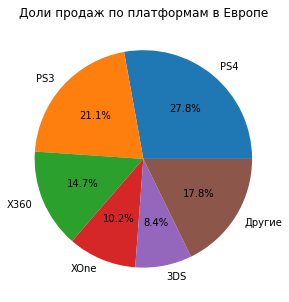

In [55]:
eu_p_sales = df_new.groupby('platform')['eu_sales'].sum().reset_index()

top_eu_platforms = eu_p_sales.sort_values(by='eu_sales', ascending=False).head(5)

other_eup_sales = eu_p_sales[~eu_p_sales['platform'].isin(top_eu_platforms['platform'])]['eu_sales'].sum()

top_eu_platforms.loc[len(top_eu_platforms)] = ['Другие', other_eup_sales]

plt.figure(figsize=(5, 5))
plt.pie(top_eu_platforms['eu_sales'], labels=top_eu_platforms['platform'], autopct='%1.1f%%')
plt.title('Доли продаж по платформам в Европе')
plt.show()

Из диаграммы понятно, что основную долю рынка в Европе за актуальный период забирает PS4 (27,8% продаж). Следом за ней идут PS3 (21,1%), Xbox 360 (14,7%). Затем идет Xbox One (10,2%) и Nintendo 3DS (8,4%), остальные приставки суммарно забирают 17,8% европейского рынка.

Определим какие жанры популярны в Европе:

In [56]:
df_new.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29


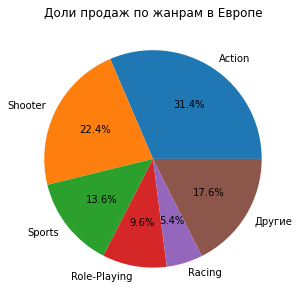

In [57]:
eu_g_sales = df_new.groupby('genre')['eu_sales'].sum().reset_index()

top_eu_genres = eu_g_sales.sort_values(by='eu_sales', ascending=False).head(5)

other_eug_sales = eu_g_sales[~eu_g_sales['genre'].isin(top_eu_genres['genre'])]['eu_sales'].sum()

top_eu_genres.loc[len(top_eu_genres)] = ['Другие', other_eug_sales]

plt.figure(figsize=(5, 5))
plt.pie(top_eu_genres['eu_sales'], labels=top_eu_genres['genre'], autopct='%1.1f%%')
plt.title('Доли продаж по жанрам в Европе')
plt.show()

Из диаграммы понятно, что основную долю рынка за актуальный период забирает Action(31,4%) и Shooter (22,4%). Следом за ними идут Sports(13,6%), Role-playing(9,6%) и Racing (5,4%). Все остальные жанры суммарно занимают около 17,6% продаж.

Определим какие возрастные категории популярны среди геймеров в Европе:

In [58]:
df_new.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(10)

,eu_sales
rating,
M,193.96
E,113.02
WR,91.50
E10+,55.37
T,52.96


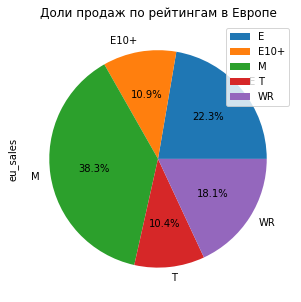

In [59]:
df_new.groupby('rating').agg({'eu_sales': 'sum'}).plot(kind='pie', figsize=(5,5), y = 'eu_sales', autopct='%1.1f%%')
plt.title('Доли продаж по рейтингам в Европе')
plt.show()

Вывод по рейтингам в Европе: с большим отрывом как и в Северной Америке продаются игры с рейтингом M(17+) (38,3%); игры с рейтингами E(Для всех)(22,3%) и без рейтинга (18,1%) существенно отстают. Игры с рейтингами E10+ (10+) (10,9%) и T (13+)(10,4%) продаются хуже всего.

Общий вывод по Европе:
-    основную долю рынка в Европе за актуальный период забирает PS4 (27,8% продаж). Следом за ней идут PS3 (21,1%), Xbox 360 (14,7%). Затем идет Xbox One (10,2%) и Nintendo 3DS (8,4%), остальные приставки суммарно забирают 17,8% европейского рынка;
-    основную долю рынка за актуальный период забирает Action(31,4%) и Shooter (22,4%). Следом за ними идут Sports(13,6%), Role-playing(9,6%) и Racing (5,4%). Все остальные жанры суммарно занимают около 17,6% продаж;
-    с большим отрывом как и в Северной Америке продаются игры с рейтингом M(17+) (38,3%); игры с рейтингами E(Для всех)(22,3%) и без рейтинга (18,1%) существенно отстают. Игры с рейтингами E10+ (10+) (10,9%) и T (13+)(10,4%) продаются хуже всего.

Таким образом, типичный европейский геймер очень близок к северно американскому, с той лишь разницей, что предпочитает PS4.

### Типичный пользователь из Японии

Определим какие платформы наиболее популярны в Японии:

In [60]:
df_new.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


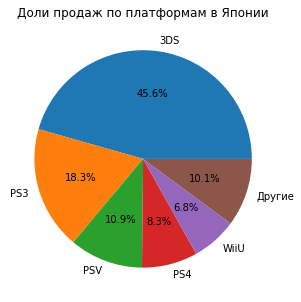

In [61]:
jp_p_sales = df_new.groupby('platform')['jp_sales'].sum().reset_index()

top_jp_platforms = jp_p_sales.sort_values(by='jp_sales', ascending=False).head(5)

other_jpp_sales = jp_p_sales[~jp_p_sales['platform'].isin(top_jp_platforms['platform'])]['jp_sales'].sum()

top_jp_platforms.loc[len(top_jp_platforms)] = ['Другие', other_jpp_sales]

plt.figure(figsize=(5, 5))
plt.pie(top_jp_platforms['jp_sales'], labels=top_jp_platforms['platform'], autopct='%1.1f%%')
plt.title('Доли продаж по платформам в Японии')
plt.show()

Так, геймеры из Японии предпочитают с огромнейшим отрывом Nintendo 3DS (45,6%), далее идут PS3(18,3%), PSV(10,9%), PS4(8,3%), WiiU(6,8%). Остальные приставки суммарно забирают 10,1% рынка.

Определим какие жанры популярны в Японии:

In [62]:
df_new.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


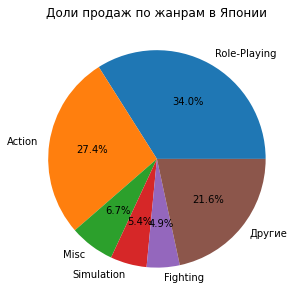

In [63]:
jp_g_sales = df_new.groupby('genre')['jp_sales'].sum().reset_index()

top_jp_genres = jp_g_sales.sort_values(by='jp_sales', ascending=False).head(5)

other_jpg_sales = jp_g_sales[~jp_g_sales['genre'].isin(top_jp_genres['genre'])]['jp_sales'].sum()

top_jp_genres.loc[len(top_jp_genres)] = ['Другие', other_jpg_sales]

plt.figure(figsize=(5, 5))
plt.pie(top_jp_genres['jp_sales'], labels=top_jp_genres['genre'], autopct='%1.1f%%')
plt.title('Доли продаж по жанрам в Японии')
plt.show()

Японцы отличаются и здесь. Большинство предпочитают играть Role_playing(34%), следом с существенным отставанием идет Action (27,4%), замыкают топ-5 Misc(6,7%), Simulation(5,4%), Fighting(4,9%). Остальные жанры суммарно забирают 21,6% рынка в Японии.

Определим какие возрастные категории популярны среди геймеров в Японии:

In [64]:
df_new.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
rating,
WR,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


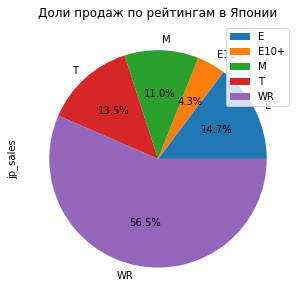

In [65]:
df_new.groupby('rating').agg({'jp_sales': 'sum'}).plot(kind='pie', figsize=(5,5), y = 'jp_sales', autopct='%1.1f%%')
plt.title('Доли продаж по рейтингам в Японии')
plt.show()

Для страны из другой части света вполне нормально не обращаться в организацию ESRB для присвоения её играм своего рейтинга. Тем более что в Японии есть своя организация, которая занимается этими вещами. ПОэтому вполне логично, что распределение продаж по рейтингам выглядит так: львиная доля рынка за играми без рейтинга ESRB (56,5%), затем идут с более-менее близким друг к другу результатом E(14,7%), T(13,5%), M(11%). Замыкают рейтинг в Японии игры с рейтингом E10+(4,3%).

Вывод по Японии:
-    геймеры из Японии предпочитают с огромнейшим отрывом Nintendo 3DS (45,6%), далее идут PS3(18,3%), PSV(10,9%), PS4(8,3%), WiiU(6,8%). Остальные приставки суммарно забирают 10,1% рынка;
-    большинство японцев предпочитают играть Role_playing(34%), следом с существенным отставанием идет Action (27,4%), замыкают топ-5 Misc(6,7%), Simulation(5,4%), Fighting(4,9%). Остальные жанры суммарно забирают 21,6% рынка в Японии;
-    что касается возрастных рейтингов, то тут всё сложнее, из-за того что страна имеют свою развитую индустрию видеоигр, свой менталитет, который может немного отличаться от американского/европейского и свою организацию по возрастным рейтингам, вроде бы она носит название CERO. Поэтому японцы играют в основном в игры без рейтинга ESRB.
Таким образом, типичный геймер из японии - это приверженец приставки Nintendo 3DS и играющий в role-playing или Action.


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

### Сводные графики

#### Платформы

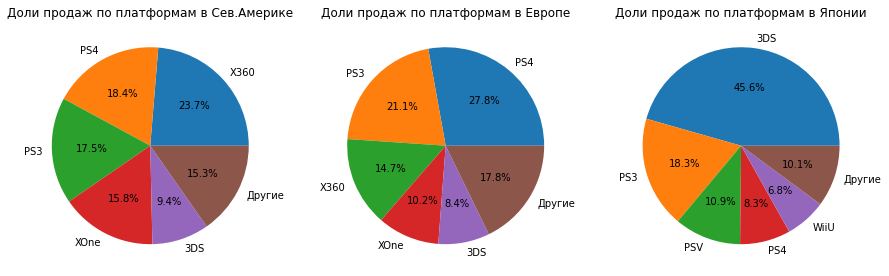

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(top_na_platforms['na_sales'], labels=top_na_platforms['platform'], autopct='%1.1f%%')
axs[0].set_title('Доли продаж по платформам в Сев.Америке')

axs[1].pie(top_eu_platforms['eu_sales'], labels=top_eu_platforms['platform'], autopct='%1.1f%%')
axs[1].set_title('Доли продаж по платформам в Европе')

axs[2].pie(top_jp_platforms['jp_sales'], labels=top_jp_platforms['platform'], autopct='%1.1f%%')
axs[2].set_title('Доли продаж по платформам в Японии')

plt.show()

#### Жанры

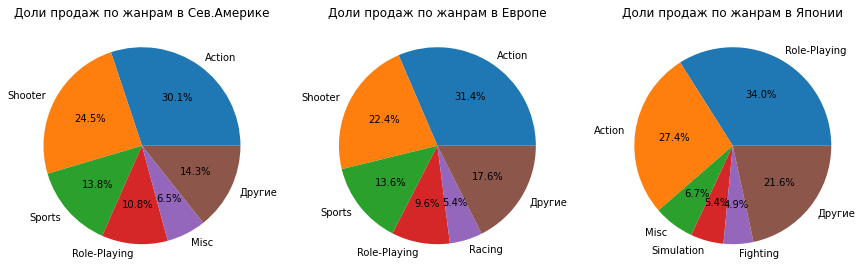

In [67]:
fig, axy = plt.subplots(1, 3, figsize=(15, 5))
axy[0].pie(top_na_genres['na_sales'], labels=top_na_genres['genre'], autopct='%1.1f%%')
axy[0].set_title('Доли продаж по жанрам в Сев.Америке')

axy[1].pie(top_eu_genres['eu_sales'], labels=top_eu_genres['genre'], autopct='%1.1f%%')
axy[1].set_title('Доли продаж по жанрам в Европе')

axy[2].pie(top_jp_genres['jp_sales'], labels=top_jp_genres['genre'], autopct='%1.1f%%')
axy[2].set_title('Доли продаж по жанрам в Японии')

plt.show()

#### Рейтинги

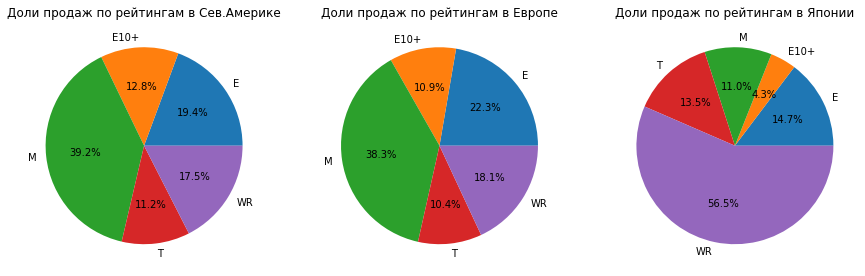

In [68]:
fig, axz = plt.subplots(1, 3, figsize=(15, 5))

# Группировка данных по рейтингу и суммарным продажам в каждом регионе
na_rating_sales = df_new.groupby('rating')['na_sales'].sum()
eu_rating_sales = df_new.groupby('rating')['eu_sales'].sum()
jp_rating_sales = df_new.groupby('rating')['jp_sales'].sum()

# Круговая диаграмма для продаж по рейтингам в Северной Америке
axz[0].pie(na_rating_sales, labels=na_rating_sales.index, autopct='%1.1f%%')
axz[0].set_title('Доли продаж по рейтингам в Сев.Америке')

# Круговая диаграмма для продаж по рейтингам в Европе
axz[1].pie(eu_rating_sales, labels=eu_rating_sales.index, autopct='%1.1f%%')
axz[1].set_title('Доли продаж по рейтингам в Европе')

# Круговая диаграмма для продаж по рейтингам в Японии
axz[2].pie(jp_rating_sales, labels=jp_rating_sales.index, autopct='%1.1f%%')
axz[2].set_title('Доли продаж по рейтингам в Японии')

plt.show()

Общий вывод: 

-    Предпочтения по платформам в зависимости от региона имеют свои отличия. В Америке предпочитают Xbox 360 и PS4, в Европе PS4 и PS3, в Японии абсолютный лидер 3DS;
-    Предпочтения по жанрам в зависимости от региона также имеют свои отличия. В Америке и Европе в лидерах Action и Shooter в Японии Role-playing и Action;
-    Рейтинг ESRB как можно заметить влияет на продажи в Северной Америке и Европе. Поскольку данная организация базируется в США, вполне объяснимо, что пользователи из Западных стран обращают на данный показатель внимание при покупке (несмотря на то, что некоторые из европейских стран имеют свои подобные организации). При этом Япония, которая во-первых, сама по себе является крупным поставщиком видеоигр может в этом плане стоять "особняком" и не обращать внимание на данный параметр, а во-вторых, У Японии есть своя подобная организация - CERO. Но у нас нет данных в нашем ДФ по их рейтингам. Поэтому, придется довольствоваться тем что есть.
В данном случае наличие рейтинга ESRB также указывает на то, что игра выпущена Северно-Американском регионе.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу, что средние рейтинги пользователей на Xbox One и PC одинаковые. Примем: 
-    нулевая гипотеза будет состоять в следующем: среднее рейтингов для генеральной совокупности «пользователи Xbox One» равно среднему рейтингов генеральной совокупности «пользователи PC»;
-    альтернативная гипотеза будет состоять в следующем: между средними рейтингов двух генеральных совокупностей есть статистически значимые различия. 
-     Примем уровень статистической значимости 0.05
-     По скольку выборки независимые, применим st.ttest_ind.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [69]:
alpha = 0.05
s_xbox = df_new.query('platform=="XOne"')['user_score']
s_pc = df_new.query('platform=="PC"')['user_score']
s_xbox = s_xbox.dropna()
s_pc = s_pc.dropna()
results = st.ttest_ind(s_xbox, s_pc)
print('p-значение: ', results.pvalue)
if results.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-значение:  0.5535080500643661
Не отвергаем нулевую гипотезу


In [70]:
df_new.groupby('platform')['user_score'].mean()

platform
3DS     7.033333
DS      7.000000
PC      6.428641
PS3     6.536525
PS4     6.748249
PSP     5.950000
PSV     7.410000
Wii     6.082353
WiiU    6.904000
X360    6.220851
XOne    6.521429
Name: user_score, dtype: float64

Проведенный эксперимент показывает, что мы не можем отклонить нулевую гипотезу о том, что средние пользовательские рейтинги для обеих платформ одинаковые. Вероятно, рейтинги пользователей в данном случае сильно близки. Это подтверждают данные о средних пользовательских рейтингах по платформам.

### Средние пользовательские рейтинги жанров Action и Sports разные

Проверим гипотезу, что средние рейтинги пользователей жанров action и sports разные. Примем:
-    нулевая гипотеза состоит в следующем: среднее рейтингов для генеральной совокупности action равно среднему рейтингов генеральной совокуности sports;
-    альтернативная гипотеза состоит в следующем: между средними рейтингов двух генеральных совокупностей есть значимые различия. 
-    Примем уровень статистической значимости 0.05
-    По скольку выборки независимые, применим st.ttest_ind.

In [71]:
s_action = df_new.query('genre=="Action"')['user_score'].dropna()
s_sports = df_new.query('genre=="Sports"')['user_score'].dropna()
results = st.ttest_ind(s_action, s_sports)
print('p-значение: ', results.pvalue)
if results.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-значение:  4.8045233804629176e-26
Отвергаем нулевую гипотезу


In [72]:
df_new.groupby('genre')['user_score'].mean()

genre
Action          6.825048
Adventure       7.466667
Fighting        6.895714
Misc            6.938806
Platform        6.806061
Puzzle          7.633333
Racing          6.151163
Role-Playing    7.258480
Shooter         6.435897
Simulation      6.511905
Sports          5.455670
Strategy        6.420000
Name: user_score, dtype: float64

Действительно, рейтинги пользователей по жанрам Action и Sports имеют достаточные отличия.

Проведенный эксперимент показывает, что мы можем отклонить нулевую гипотезу о том, что средние пользовательские рейтинги для обеих платформ одинаковые. Вероятно, рейтинги пользоветелей в данном случае разные. Это подтверждают данные о средних пользовательских рейтингах по жанрам.

## Общий вывод

В процессе работы по проекту были загружены и обработы данные о продажах видеоигр в разных частях света, пользовательских и оценках критиков по этим играм, также файл содержал данные по названиям, жанрам и платформам.
Была проведена небольшая предобработка данных, исследовательский анализ и проверены некоторые гипотезы.
Основной задачей проекта исходя из изученных данных было выявить критерии игр имеющих наибольшие продажи, что позволить сделать прогноз по продажам на перспективу и запланировать маркетинговые шаги, иными словами решить на что потратить рекламный бюджет.
Данные имели обширный срок с 1980-ых годов по 2017 год, но поскольку одни приставки выбывают, другие появляются, причем жизненный цикл платформы в среднем составляет 7-8 лет, был принято решения использовать в исследовании данные только за актуальный период, который в данном случае принят как наиболее "свежие" 5 лет.
+ Установлено: 
*    на конец 2016 года самые востребованные приставки - в Европе PS4 , В Америке Xbox 360, при этом если рассматривать Японию, то там стоит рассмотреть Nintendo 3DS;
*    пользовательские отзывы никак не влияют на продажи, а отзывы критиков имеют очень небольшое влияние на продажи, скорее всего, при выборе рекламы не стоит уделять этому пристальное внимание;
*    наиболее продаваемые жанры - В Америке и Европе - Action, в Японии данный жанр также сильно популярен, но в лидерах там с большим отрывом - role-playing;
*    средний портрет пользователя Европы и Америки схож, там играют во взрослые игры с рейтингом M. В Японии своя организация присвоения рейтингов, и данных по ней нет, поэтому этот регион в этом плане слабо информативен.

*    В рамках статистического анализа было выявлено что:
средние рейтинги пользователей для платформ Xbox One и PC не различаются;
средние рейтинги пользователей для игр жанров Action и Sports статистически значимо различаются.


Итог
Исходя из проведенного исследования наиболее перспективным вложением денег будет взрослая Action-видеоигра на платформах PS4 или же Xbox 360. При этом от себя добавлю, что PS4 - более свежая платформа и её запас актуальности скорее всего будет дольше, поэтому из двух я бы выбрал именно её. Следует добавить, что в Японии сильно популярна Nintendo 3DS, но население Японии суммарно сильно меньше чем население Северной Америки и Европы вместе взятых, следовательно ориентироваться на Японию в данном случае не стоит.